<a href="https://colab.research.google.com/github/jm-menon/sentiment-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df= pd.read_csv('/content/drive/MyDrive/Reviews.csv')
df.head()
#df['Text'].values[3]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df.shape
df=df.head(500)
df.shape

(500, 10)

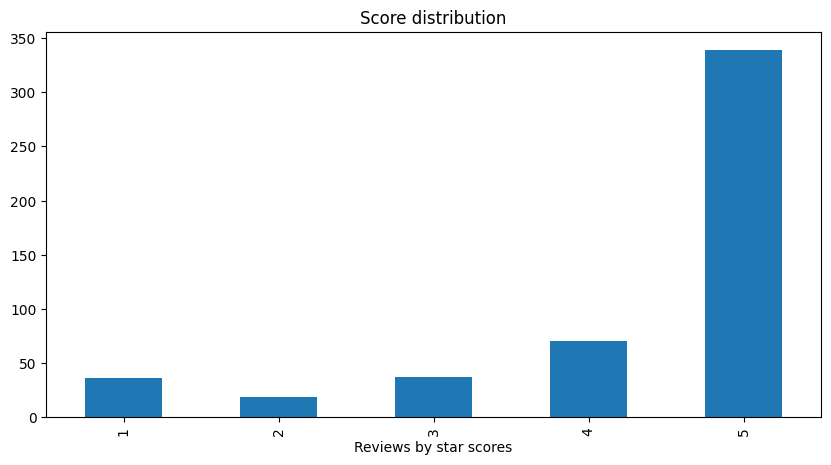

In [15]:
#some eda
ax=df['Score'].value_counts()\
.sort_index().plot(kind='bar',
                   title='Score distribution',
                   figsize=(10, 5))
ax.set_xlabel('Reviews by star scores')
plt.show()

##Some Basic NLTK

In [57]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

# Download once (can be in a separate cell)
nltk.download(['words', 'punkt_tab', 'averaged_perceptron_tagger_eng', 'maxent_ne_chunker_tab'])

# Example text
sample = df['Text'][50]
print(sample)

# Pipeline
tokens = word_tokenize(sample)
tagged = pos_tag(tokens)
chunked = ne_chunk(tagged)

# Pretty-print the tree
chunked.pprint()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


##VADER Based Sentiment Analysis

here the sentiment analysis is done with a dictionary of words weighted by scores ranging [-4, 4] as positive or negative. But these do not take the relationship between words into consideration while assiging positive or negative emotions.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm